## Filtering in Hadamard Domain
### CS4243, CW2, Q6

In [38]:
from scipy.linalg import hadamard
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [39]:
int2bin = lambda x, n: format(x, 'b').zfill(n)

In [40]:
#
# The function generates an ideal low pass filter for frequency domain, 
# M and N are size of the filter/image, D0 is the cut_off point. 
# 
def idealLowPass(M, N, D0):
    # Initializing the filter with ones; since the filter is a complex function,
    # it has two channels, representing the real and imaginary parts:
    filter = np.ones((M, N), dtype=np.uint8)
    D0 = min(M,N) / 2 * D0
    # Scanning through each pixel and calculating the distance of each pixel
    # to the image center. If the pixel is within D0, it is changed to 0:
    for i in range(M):
        for j in range(N):
            if ( (i-M/2)**2 + (j-N/2)**2)**0.5 >= D0:
                filter[i,j]= 0
            
    return filter


In [41]:
# function to compute the image power. input could be graylevel or color. 
#
def am_power(a):
    pa = 0.0 
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                pa += a[i,j]**2
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]
        for i in range(dim1[0]):
            for j in range(dim1[1]):
                for k in range(dim1[2]):
                    pa += a[i,j,k]**2
    pa = pa / sz
    return pa

In [42]:
def horder(b,nn): 
    jj = int2bin(b,nn)
    kk = ''
    for j in range(nn): 
        kk = kk+jj[nn-1-j] 
    
    kkk=np.zeros(nn) 
    kkk[0] = kk[0] 
    for j in range(1,nn):
        kkk[j] = int(kkk[j-1]) ^ int(kk[j]) 
        
    k=0
    for j in range(nn):
        k = k + int(kkk[j]) * 2**(nn-1-j)  

    return int(k)

In [43]:
# h = ordhad(n) 
# generate a n*n ordered hadamard matrix
# amir - may 2022
#

def ordhad(n): 
    h = hadamard(n)
    hh = hadamard(n)
    nn = np.log2(n)
    for i in range(n):
        k = horder(int(i) , int(nn)) 
        hh[k][:] = h[i][:]

    return hh

In [44]:
def ready_2_show(a, level=255):
    a = ( a - np.min(a) ) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)


In [45]:
# setting the cut_off frequency to ...
ctf = 0.6     # lower cut-off frequency
ctf2 = 0.9    # higher cut-off frequency
MM = 256     # we convert the input image into MMxMM size

In [46]:
# ordered Hadamard Matrix
h = ordhad(MM)

In [47]:
# reading and pre-processing of the image, it will be graylevel and will be converted to MMxMM pixel
img = cv2.cvtColor(cv2.imread('06600600u.bmp'), cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(MM,MM))

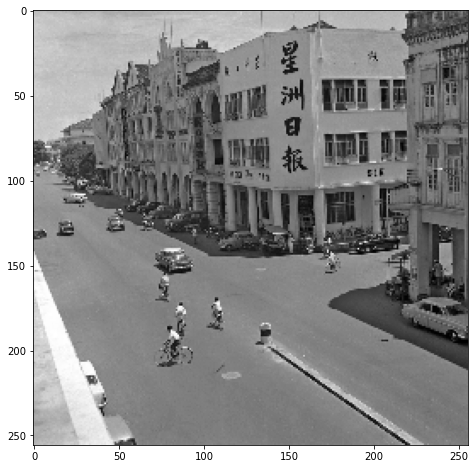

In [48]:
fig, axes = plt.subplots(1,1, figsize=(8,8))
axes.imshow(img, 'gray')

In [49]:
# Hadamard Transform
HI = np.matmul( h, np.matmul(img,h) )

In [51]:
# building the filter
# a double size LP filter, ideal, cut-off=ctf
filt1 = idealLowPass(MM*2,MM*2,ctf)
# keeping quarter4 of that
filt1 = filt1[MM:2*MM,MM:2*MM]
# a double size LP filter, ideal, cut-off=ctf2, where ctf2>ctf
filt2 = idealLowPass(MM*2,MM*2,ctf2)
# keeping quarter4 of that
filt2 = filt2[MM:2*MM,MM:2*MM]

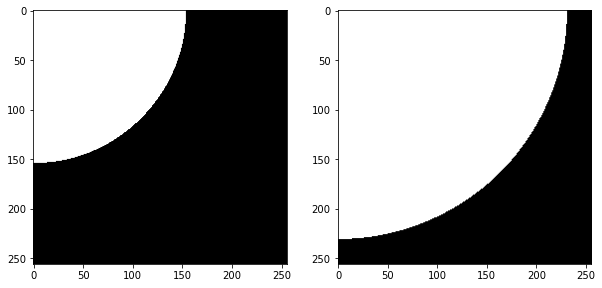

In [52]:
fig, axes = plt.subplots(1,2, figsize=(10,20))
axes[0].imshow(filt1, 'gray')
axes[1].imshow(filt2, 'gray')

## Q4 Band pass filter

In [53]:
filter_bp = filt2 - filt1

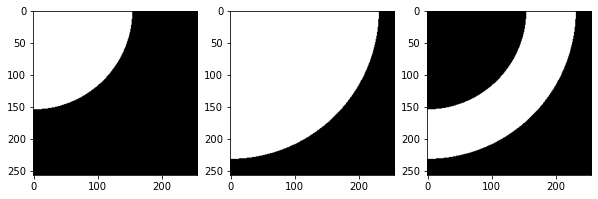

In [54]:
fig, axes = plt.subplots(1,3, figsize=(10,30))
axes[0].imshow(filt1, 'gray')
axes[1].imshow(filt2, 'gray')
axes[2].imshow(filter_bp, 'gray')

In [55]:
HI_bp = np.multiply(HI,filter_bp)
# inverse Hadamard, constant coeeficient is 1/ image size, result in h2
h_bp = np.dot( np.matmul( h, np.matmul(HI_bp,h)) , 1/(MM**2) )

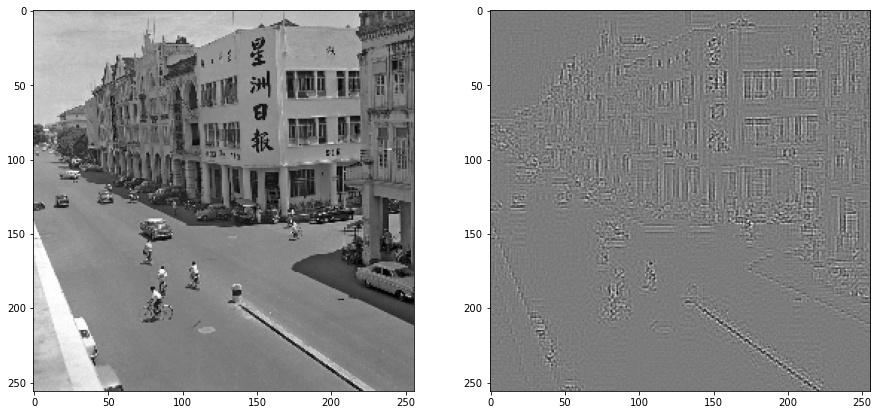

In [56]:
fig, axes = plt.subplots(1,2, figsize=(15,30))
axes[0].imshow(img, 'gray')
axes[1].imshow(h_bp, 'gray')


## Q5 three bandpass

In [ ]:
ctf= 0.1     # lower cut-off frequency
ctf2 = 0.3
ctf3 = 0.7 

In [60]:
# building the filter
# a double size LP filter, ideal, cut-off=ctf
filt1 = idealLowPass(MM*2,MM*2,ctf)
# keeping quarter4 of that
filt1 = filt1[MM:2*MM,MM:2*MM]
# a double size LP filter, ideal, cut-off=ctf2, where ctf2>ctf
filt2 = idealLowPass(MM*2,MM*2,ctf2)
# keeping quarter4 of that
filt2 = filt2[MM:2*MM,MM:2*MM]

filt3 = idealLowPass(MM*2,MM*2,ctf3)
# keeping quarter4 of that
filt3 = filt3[MM:2*MM,MM:2*MM]

In [63]:
filt_bp1 = filt1
filt_bp2 = filt2 - filt1
filt_bp3 = filt3 - filt2

HI_bp1 = np.multiply(HI,filt_bp1)
h_bp1 = np.dot( np.matmul( h, np.matmul(HI_bp1,h)) , 1/(MM**2) )

HI_bp2 = np.multiply(HI,filt_bp2)
h_bp2 = np.dot( np.matmul( h, np.matmul(HI_bp2,h)) , 1/(MM**2) )

HI_bp3 = np.multiply(HI,filt_bp3)
h_bp3 = np.dot( np.matmul( h, np.matmul(HI_bp3,h)) , 1/(MM**2) )

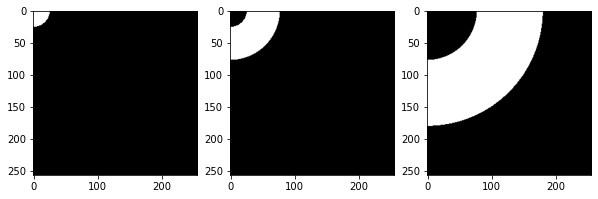

In [62]:
fig, axes = plt.subplots(1,3, figsize=(10,30))
axes[0].imshow(filt_bp1, 'gray')
axes[1].imshow(filt_bp2, 'gray')
axes[2].imshow(filt_bp3, 'gray')

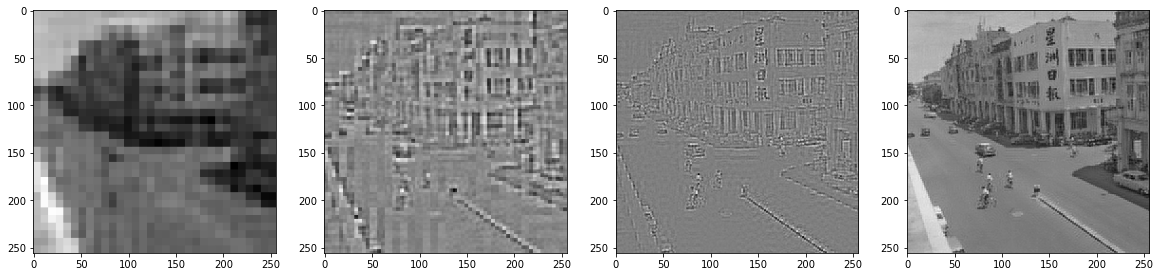

In [68]:
fig, axes = plt.subplots(1,4, figsize=(20,60))
axes[0].imshow(h_bp1, 'gray')
axes[1].imshow(h_bp2, 'gray')
axes[2].imshow(h_bp3, 'gray')
axes[3].imshow(h_bp1+h_bp2+h_bp3, 'gray')

In [74]:
img.mean()

125.07986450195312

In [76]:
(h_bp1**2).mean(), (h_bp2**2).mean(), (h_bp3**2).mean(), ((h_bp1+h_bp2+h_bp3)**2).mean()

(17062.295694054104,
 317.47044492606074,
 262.8415773231536,
 17830.39,
 17642.60771630332)

## Q6 band reject

In [77]:
# configuration of a BR filter for Hadamard domain
filt_reject = 1 - (filt2 - filt1)
# filtering ...
HI_reject = np.multiply(HI,filt2)
# inverse Hadamard, constant coeeficient is 1/ image size, result in h2
h_reject = np.dot( np.matmul( h, np.matmul(HI_reject,h)) , 1/(MM**2) )

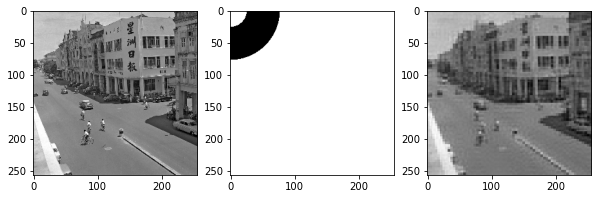

In [78]:
fig, axes = plt.subplots(1,3, figsize=(10,30))
axes[0].imshow(img, 'gray')
axes[1].imshow(filt_reject, 'gray')
axes[2].imshow(h_reject, 'gray')